<a href="https://colab.research.google.com/github/trucphuongbvc/Phantichdulieuhcsau/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def load_data(filename):
  return pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/'+filename)
df = load_data('titanic_disaster.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#câu 1
print(df.head(10))

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S
5            6         0       3  ...   8.4583   NaN         Q
6            7         0       1  ...  51.8625   E46         S
7            8         0       3  ...  21.0750   NaN         S
8            9         1       3  ...  11.1333   NaN         S
9           10         1       2  ...  30.0708   NaN         C

[10 rows x 12 columns]


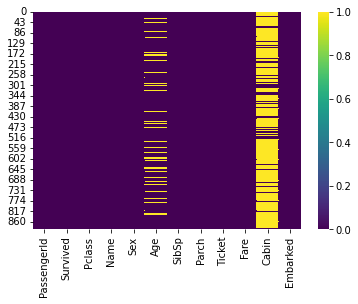

None
PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin           19
Embarked       177
dtype: int64
PassengerId    687
Survived       687
Pclass         687
Name           687
Sex            687
Age            529
SibSp          687
Parch          687
Ticket         687
Fare           687
Cabin            0
Embarked       687
dtype: int64
PassengerId    2
Survived       2
Pclass         2
Name           2
Sex            2
Age            2
SibSp          2
Parch          2
Ticket         2
Fare           2
Cabin          2
Embarked       0
dtype: int64


In [4]:
#câu2
sns.heatmap(df.isna(),cmap='viridis')
print(plt.show())
df_thieu_age=df[df['Age'].isna()]
print(df_thieu_age.count())
df_thieu_carbin=df[df['Cabin'].isna()]
print(df_thieu_carbin.count())
df_thieu_Embarked=df[df['Embarked'].isna()]
print(df_thieu_Embarked.count())

In [8]:
#câu 3
df[['firstname','secondname']]=df['Name'].str.split(',',expand=True)
df=df.drop('Name',axis=1)
df.head(5)


KeyError: ignored

In [9]:
#câu 4
df['Sex'].replace('male','M',inplace=True)
df['Sex'].replace('female','F',inplace=True)
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstname,secondname
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


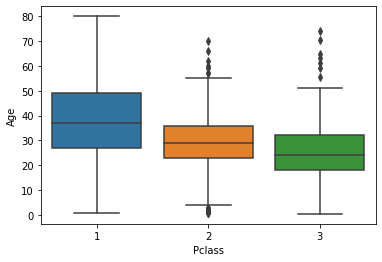

None


In [10]:
#câu5
sns.boxplot(y='Age',x='Pclass',data=df)
print(plt.show())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

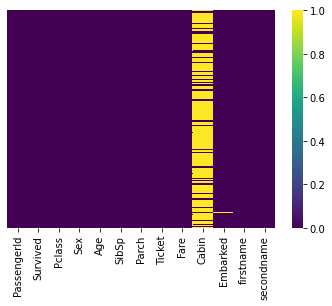

None


In [11]:
# thay dữ liệu age bị thiếu
df['Age'][df['Pclass']==1]=df['Age'][df['Pclass']==1].fillna(df['Age'][df['Pclass']==1].mean())
df['Age'][df['Pclass']==2]=df['Age'][df['Pclass']==2].fillna(df['Age'][df['Pclass']==2].mean())
df['Age'][df['Pclass']==3]=df['Age'][df['Pclass']==3].fillna(df['Age'][df['Pclass']==3].mean())

sns.heatmap(df.isna(),yticklabels=False,cbar=True,cmap='viridis')
print(plt.show())

In [ ]:
sns.heatmap(df[['Age']].isna(), cmap = 'Reds', yticklabels= False)

In [12]:
#câu 6
for i in df['Age']:
  df.loc[(df['Age'] <=  12), 'Agegroup'] ='Kid'
  df.loc[(df['Age'] > 12) & (df['Age'] <= 18), 'Agegroup'] ='Teen'
  df.loc[(df['Age'] > 18) & (df['Age'] <= 60), 'Agegroup'] ='Adult'
  df.loc[(df['Age'] > 60), 'Agegroup'] ='Older'
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstname,secondname,Agegroup
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult
5,6,0,3,M,25.14062,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult
6,7,0,1,M,54.00000,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult
7,8,0,3,M,2.00000,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid
8,9,1,3,F,27.00000,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult
9,10,1,2,F,14.00000,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen


In [13]:
#câu 7
df[['namePrefix','secondname' ]] =df['secondname'].str.split('. ',1,expand = True)
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstname,secondname,Agegroup,namePrefix
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Adult,Mr
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult,Mrs
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Adult,Miss
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult,Mrs
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Adult,Mr


In [14]:
#câu 8
df['familySize']= df['SibSp'] +df['Parch'] +1
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstname,secondname,Agegroup,namePrefix,familySize
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Adult,Mr,2
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult,Mrs,2
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Adult,Miss,1
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult,Mrs,2
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Adult,Mr,1


In [15]:
#câu 9
for i in df['familySize']:
  df.loc[(df['familySize'] ==  0), 'Alone'] = 1
  df.loc[(df['familySize'] !=  0), 'Alone'] = 0
df.Alone

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    0.0
890    0.0
Name: Alone, Length: 891, dtype: float64

In [16]:
#câu 10
df['typeCabin']= None
Cabin= df.Cabin
for i in range(len(Cabin)):
  if pd.isna(df.Cabin[i]) == True:
    df['typeCabin'][i]= '―Unknown'
  else:
    df['typeCabin'][i]= df.Cabin[i][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstname,secondname,Agegroup,namePrefix,familySize,Alone,typeCabin
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Adult,Mr,2,0.0,―Unknown
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult,Mrs,2,0.0,C
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Adult,Miss,1,0.0,―Unknown
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult,Mrs,2,0.0,C
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,William Henry,Adult,Mr,1,0.0,―Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,M,27.00000,0,0,211536,13.0000,NaN,S,Montvila,Juozas,Adult,Rev,1,0.0,―Unknown
887,888,1,1,F,19.00000,0,0,112053,30.0000,B42,S,Graham,Margaret Edith,Adult,Miss,1,0.0,B
888,889,0,3,F,25.14062,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Catherine Helen ""Carrie""",Adult,Miss,4,0.0,―Unknown
889,890,1,1,M,26.00000,0,0,111369,30.0000,C148,C,Behr,Karl Howell,Adult,Mr,1,0.0,C


In [18]:
#câu 12
Sur_Sex= df.groupby(['Survived', 'Sex'])[['Survived']].count()
Sur_Sex

Survived
Survived Sex          
0        F          81
         M         468
1        F         233
         M         109

In [19]:
unstackSur_Sex = Sur_Sex.unstack()
unstackSur_Sex

Survived     
Sex             F    M
Survived              
0              81  468
1             233  109

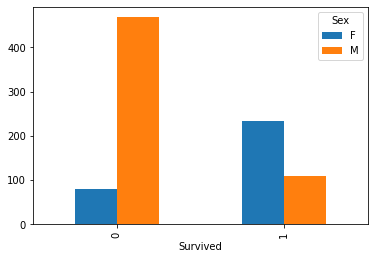

In [20]:
unstackSur_Sex['Survived'].plot.bar()

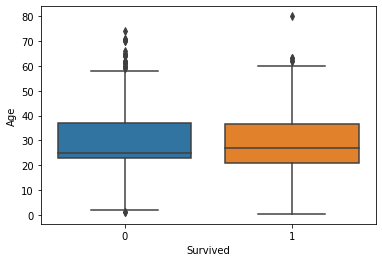

In [21]:
sns.boxplot(y='Age', x='Survived', data = df)

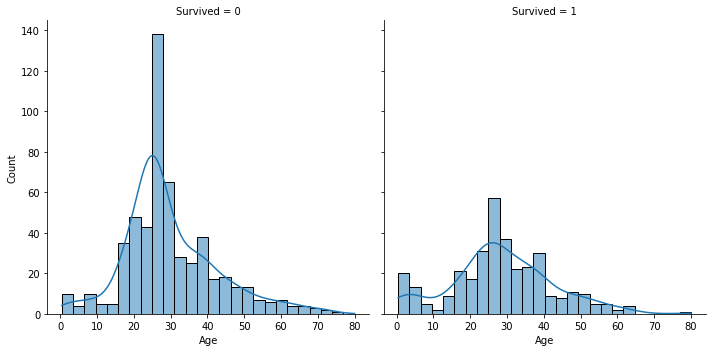

In [22]:
sns.displot(df, x="Age", col="Survived", kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


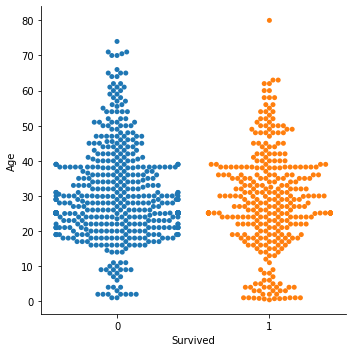

In [23]:
sns.catplot(x="Survived", y="Age", kind="swarm",data=df)

In [24]:
Sur_Pclass= df.groupby(['Survived', 'Pclass'])[['Survived']].count()
Sur_Pclass

Survived
Survived Pclass          
0        1             80
         2             97
         3            372
1        1            136
         2             87
         3            119

In [25]:
unstackSur_Pclass = Sur_Pclass.unstack()
unstackSur_Pclass

Survived         
Pclass          1   2    3
Survived                  
0              80  97  372
1             136  87  119

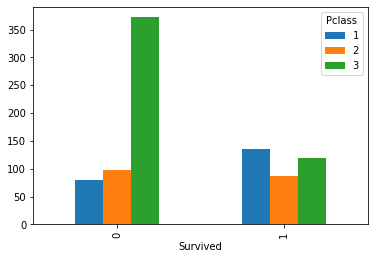

In [26]:
unstackSur_Pclass['Survived'].plot.bar()

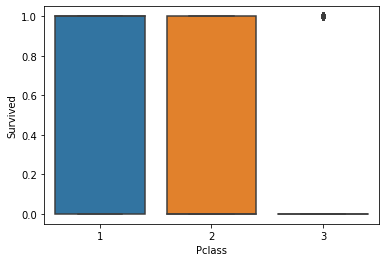

In [27]:
sns.boxplot(y='Survived', x='Pclass', data = df)

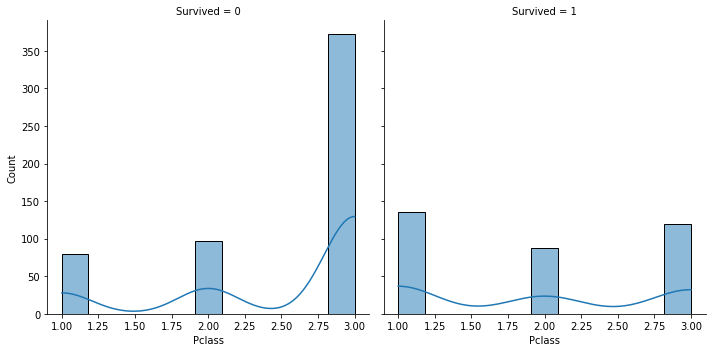

In [28]:
sns.displot(df, x="Pclass", col="Survived", kde=True)

In [31]:
Sur_Sex_Agegroup= df.groupby(['Survived', 'Sex','Agegroup'])[['Survived']].count()
Sur_Sex_Agegroup

Survived
Survived Sex Agegroup          
0        F   Adult           59
             Kid             13
             Teen             9
         M   Adult          404
             Kid             16
             Older           17
             Teen            31
1        F   Adult          184
             Kid             19
             Older            3
             Teen            27
         M   Adult           83
             Kid             21
             Older            2
             Teen             3

In [30]:
unstackSur_Sex_Agegroup = Sur_Sex_Agegroup.unstack()
unstackSur_Sex_Agegroup

NameError: ignored

In [32]:
unstackSur_Sex_Agegroup['Survived'].plot.bar()

NameError: ignored

In [ ]:
sns.catplot(x="Survived", y="Age", hue='Agegroup', kind="swarm",data=df)